# Workgroup 4

- Francisco Arizola

# Bootstraping

In [ ]:
library(sandwich)
library(lmtest)
library(Hmisc)
library(ggplot2)
library(grf)
library(boot)
library(rpart)
library(randomForest)
library(nnet)
library(gbm)
library(rpart.plot)
library(keras)

In [ ]:
## loading the data
data <- as.data.frame(read.table("/content/penn_jae.dat", header=T ))
attach(data)

In [ ]:
head(data)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,⋯,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,10824,0,18,18,0,0,0,0,2,0,⋯,1,0,0,0,0,0,0,0,1,0
2,10635,2,7,3,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0
3,10551,5,18,6,1,0,0,0,0,0,⋯,0,0,1,0,1,0,0,0,0,0
4,10824,0,1,1,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,1,0,0
5,10747,0,27,27,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
6,10544,6,7,7,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1


In [ ]:
T4<- (tg==4)
summary(T4)

   Mode   FALSE    TRUE 
logical   12168    1745 

In [ ]:
boot.fn <- function(data, index)
  coef(lm(log(inuidur1)~T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd), data = data, subset = index))


In [ ]:
boot.fn(data, 1:nrow(data))

(Intercept)       T4TRUE       female        black      othrace factor(dep)1 
  2.06994162  -0.02545369   0.10542736  -0.37603073  -0.29286273   0.05125942 
factor(dep)2           q2           q3           q4           q5           q6 
  0.08075024   0.16049220   0.05657225   0.02666412  -0.02339588   0.19088538 
     agelt35      agegt54      durable         lusd         husd 
 -0.20512210   0.22840617   0.04888303  -0.16521057  -0.05278625

In [ ]:
set.seed(1)
boot.fn(data, sample(1:nrow(data), nrow(data), replace = T))


(Intercept)       T4TRUE       female        black      othrace factor(dep)1 
  1.98198313  -0.03022206   0.06364903  -0.40263879  -0.34618925   0.03239137 
factor(dep)2           q2           q3           q4           q5           q6 
  0.06657576   0.22490654   0.17710882   0.16103921   0.08706296   0.30545574 
     agelt35      agegt54      durable         lusd         husd 
 -0.18350570   0.26180832  -0.01411110  -0.18607889  -0.01212879

In [ ]:
reg_lineal = boot(data, boot.fn, 1000)
reg_lineal


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
        original        bias    std. error
t1*   2.06994162  4.605030e-03  0.09082654
t2*  -0.02545369  7.925207e-04  0.03109526
t3*   0.10542736 -1.779291e-04  0.02141159
t4*  -0.37603073 -1.643899e-03  0.03645269
t5*  -0.29286273 -1.798467e-04  0.14496430
t6*   0.05125942  3.699729e-04  0.03237307
t7*   0.08075024 -2.542053e-04  0.02822422
t8*   0.16049220 -3.564571e-03  0.09018681
t9*   0.05657225 -3.305440e-03  0.09012448
t10*  0.02666412 -2.998147e-03  0.09045781
t11* -0.02339588 -2.609946e-03  0.08964860
t12*  0.19088538 -3.295323e-03  0.09324818
t13* -0.20512210 -1.117499e-03  0.02150277
t14*  0.22840617  3.164339e-05  0.03501137
t15*  0.04888303 -6.461105e-04  0.02809768
t16* -0.16521057 -3.928852e-04  0.02527114
t17* -0.05278625 -1.285427e-03  0.02582292

In [ ]:
summary(lm(log(inuidur1)~T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd), data = data))$coef[2:4,]


,Estimate,Std. Error,t value,Pr(>|t|)
T4TRUE,-0.02545369,0.03075427,-0.8276474,4.078844e-01
female,0.10542736,0.02115637,4.9832432,6.327962e-07
black,-0.37603073,0.03269637,-11.5006883,1.797663e-30


In [ ]:
reg_lineal


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
        original        bias    std. error
t1*   2.06994162  4.605030e-03  0.09082654
t2*  -0.02545369  7.925207e-04  0.03109526
t3*   0.10542736 -1.779291e-04  0.02141159
t4*  -0.37603073 -1.643899e-03  0.03645269
t5*  -0.29286273 -1.798467e-04  0.14496430
t6*   0.05125942  3.699729e-04  0.03237307
t7*   0.08075024 -2.542053e-04  0.02822422
t8*   0.16049220 -3.564571e-03  0.09018681
t9*   0.05657225 -3.305440e-03  0.09012448
t10*  0.02666412 -2.998147e-03  0.09045781
t11* -0.02339588 -2.609946e-03  0.08964860
t12*  0.19088538 -3.295323e-03  0.09324818
t13* -0.20512210 -1.117499e-03  0.02150277
t14*  0.22840617  3.164339e-05  0.03501137
t15*  0.04888303 -6.461105e-04  0.02809768
t16* -0.16521057 -3.928852e-04  0.02527114
t17* -0.05278625 -1.285427e-03  0.02582292

# Causal Forest

In their paper "Estimating Treatment Effects with Causal Forests: An Application," Susan Athey and Stefan Wager investigate the use of causal forests, a machine learning method, for determining the effects of interventions. They utilize data from the National Study of Learning Mindsets to examine the impact of a program designed to foster a growth mindset on students' academic outcomes. The authors tackle issues such as confounding variables and clustered data to guarantee precise findings.

In [ ]:
set.seed(1)

In [ ]:
data.all = read.csv("synthetic_data.csv")
data.all$schoolid = factor(data.all$schoolid)

DF = data.all[,-1]
school.id = as.numeric(data.all$schoolid)

school.mat = model.matrix(~ schoolid + 0, data = data.all)
school.size = colSums(school.mat)

It appears that school ID does not affect pscore.


In [ ]:
w.lm = glm(Z ~ ., data = data.all[,-3], family = binomial)
summary(w.lm)



Call:
glm(formula = Z ~ ., family = binomial, data = data.all[, -3])

Coefficients: (6 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.9524636  0.2845173  -3.348 0.000815 ***
schoolid2    0.0697302  0.2766287   0.252 0.800986    
schoolid3    0.0382080  0.2911323   0.131 0.895586    
schoolid4    0.1761334  0.2784711   0.633 0.527059    
schoolid5   -0.0033389  0.2950180  -0.011 0.990970    
schoolid6    0.0583548  0.3067481   0.190 0.849124    
schoolid7   -0.1313759  0.3188190  -0.412 0.680288    
schoolid8    0.1233661  0.3023736   0.408 0.683279    
schoolid9   -0.1955428  0.3073344  -0.636 0.524611    
schoolid10  -0.1892794  0.2968750  -0.638 0.523752    
schoolid11  -0.2224060  0.5461005  -0.407 0.683816    
schoolid12  -0.3312420  0.5414374  -0.612 0.540682    
schoolid13  -0.0408540  0.3989507  -0.102 0.918436    
schoolid14  -0.8681934  0.6033674  -1.439 0.150175    
schoolid15  -0.1059135  0.3263162  -0.325 0.74550

In [ ]:
W = DF$Z
Y = DF$Y
X.raw = DF[,-(1:2)]

In [ ]:
C1.exp = model.matrix(~ factor(X.raw$C1) + 0)
XC.exp = model.matrix(~ factor(X.raw$XC) + 0)

In [ ]:
X = cbind(X.raw[,-which(names(X.raw) %in% c("C1", "XC"))], C1.exp, XC.exp)

## Grow a forest. Add extra trees for the causal forest.

In [ ]:
Y.forest = regression_forest(X, Y, clusters = school.id, equalize.cluster.weights = TRUE)
Y.hat = predict(Y.forest)$predictions
W.forest = regression_forest(X, W, clusters = school.id, equalize.cluster.weights = TRUE)
W.hat = predict(W.forest)$predictions

In [ ]:
cf.raw = causal_forest(X, Y, W,
                       Y.hat = Y.hat, W.hat = W.hat,
                       clusters = school.id,
                       equalize.cluster.weights = TRUE)
varimp = variable_importance(cf.raw)
selected.idx = which(varimp > mean(varimp))

In [ ]:
cf = causal_forest(X[,selected.idx], Y, W,
                   Y.hat = Y.hat, W.hat = W.hat,
                   clusters = school.id,
                   equalize.cluster.weights = TRUE,
                   tune.parameters = "all")
tau.hat = predict(cf)$predictions


### 1. How the tree was built?
For the construction of the tree two separate regression forests are developed: one to predict the outcome and the other to predict the treatment assignment. These predictions then inform the creation of a causal forest, which estimates the treatment effect while taking into account school-level clustering.

## 2. Estimate ATE

In [ ]:
ATE = average_treatment_effect(cf)
paste("95% CI for the ATE:", round(ATE[1], 3),
      "+/-", round(qnorm(0.975) * ATE[2], 3))


[1] "95% CI for the ATE: 0.248 +/- 0.04"

The Average Treatment Effect (ATE) quantifies the overall impact of mindset training on students' academic scores. It is calculated by aggregating individual treatment effect estimates derived from the causal forest. This metric offers a summary of the average change in academic performance due to the mindset training.

# Omnibus tests for heterogeneity

#### 3. Run best linear predictor analysis

In [ ]:
test_calibration(cf)

# Compare regions with high and low estimated CATEs
high_effect = tau.hat > median(tau.hat)
ate.high = average_treatment_effect(cf, subset = high_effect)
ate.low = average_treatment_effect(cf, subset = !high_effect)
paste("95% CI for difference in ATE:",
      round(ate.high[1] - ate.low[1], 3), "+/-",
      round(qnorm(0.975) * sqrt(ate.high[2]^2 + ate.low[2]^2), 3))


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value Pr(>t)    
mean.forest.prediction         1.002872   0.083231 12.0493 <2e-16 ***
differential.forest.prediction 0.295629   0.642212  0.4603 0.3226    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] "95% CI for difference in ATE: 0.053 +/- 0.076"

To examine how student covariates relate to estimated treatment effects, a best linear predictor analysis was undertaken. This involved using a linear regression model, with the predicted treatment effects as the outcome variable and student characteristics as predictors. Through this approach, the analysis determines which student attributes are most strongly connected to the success of the mindset training.

### Formal test for X1 and X2


In [ ]:
dr.score = tau.hat + W / cf$W.hat *
  (Y - cf$Y.hat - (1 - cf$W.hat) * tau.hat) -
  (1 - W) / (1 - cf$W.hat) * (Y - cf$Y.hat + cf$W.hat * tau.hat)
school.score = t(school.mat) %*% dr.score / school.size

school.X1 = t(school.mat) %*% X$X1 / school.size
high.X1 = school.X1 > median(school.X1)
t.test(school.score[high.X1], school.score[!high.X1])

school.X2 = (t(school.mat) %*% X$X2) / school.size
high.X2 = school.X2 > median(school.X2)
t.test(school.score[high.X2], school.score[!high.X2])



	Welch Two Sample t-test

data:  school.score[high.X1] and school.score[!high.X1]
t = -3.0122, df = 72.046, p-value = 0.003577
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1931113 -0.0393012
sample estimates:
mean of x mean of y 
0.1897647 0.3059710 



	Welch Two Sample t-test

data:  school.score[high.X2] and school.score[!high.X2]
t = 0.98098, df = 72.274, p-value = 0.3299
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04111438  0.12079436
sample estimates:
mean of x mean of y 
0.2677878 0.2279479 


In [ ]:
school.X2.levels = cut(school.X2,
  breaks = c(-Inf, quantile(school.X2, c(1/3, 2/3)), Inf))
summary(aov(school.score ~ school.X2.levels))


                 Df Sum Sq Mean Sq F value Pr(>F)
school.X2.levels  2 0.0829 0.04143   1.334   0.27
Residuals        73 2.2663 0.03105               

### Formal test for S3




	One Sample t-test

data:  school.score.XS3.high - school.score.XS3.low
t = 2.1853, df = 75, p-value = 0.03199
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.007283702 0.157489740
sample estimates:
 mean of x 
0.08238672 


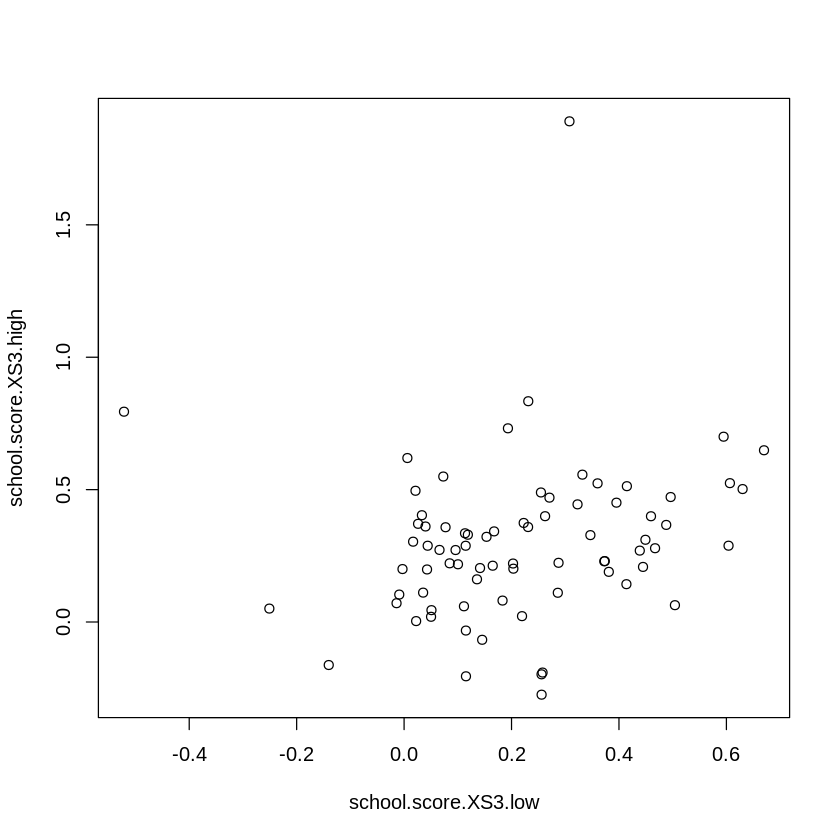

In [ ]:
school.score.XS3.high = t(school.mat) %*% (dr.score * (X$S3 >= 6)) /
  t(school.mat) %*% (X$S3 >= 6)
school.score.XS3.low = t(school.mat) %*% (dr.score * (X$S3 < 6)) /
  t(school.mat) %*% (X$S3 < 6)

plot(school.score.XS3.low, school.score.XS3.high)
t.test(school.score.XS3.high - school.score.XS3.low)

## 4. Look at school-wise heterogeneity

In [ ]:
pdf("school_hist.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(school.score, xlab = "School Treatment Effect Estimate", main = "")
dev.off()

png 
  2

This analysis investigated the varying impact of mindset training on academic scores across different schools by employing a causal forest with school-specific clusters. This method emphasizes the differences in the effectiveness of mindset training, pinpointing which schools benefit the most or the least from the intervention.

## Re-check ATE... sanity check only

In [ ]:
ate.hat = mean(school.score)
se.hat = sqrt(var(school.score) / length(school.score - 1))
print(paste(round(ate.hat, 3), "+/-", round(1.96 * se.hat, 3)))


[1] "0.248 +/- 0.04"


## Look at variation in propensity scores

In [ ]:
DF = X
DF$W.hat = cf$W.hat

pdf("pscore.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(W.hat ~ S3, data = DF, ylab = "Propensity Score", xlab = "Student Expectation of Success")
lines(smooth.spline(X$S3, cf$W.hat), lwd = 2, col = 4)
dev.off()


png 
  2

## 5. Analysis ignoring clusters

[1] "95% CI for the ATE: 0.253 +/- 0.022"


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value    Pr(>t)    
mean.forest.prediction         1.010859   0.045042 22.4427 < 2.2e-16 ***
differential.forest.prediction 0.512286   0.122889  4.1687 1.544e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5



Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value  Pr(>t)    
mean.forest.prediction         1.004175   0.064727 15.5139 < 2e-16 ***
differential.forest.prediction 0.374781   0.207144  1.8093 0.03522 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.0000128415 0.0002885303

                     Df Sum Sq Mean Sq F value   Pr(>F)    
factor(school.id)    75    204   2.725   2.001 7.01e-07 ***
Residuals         10315  14043   1.361                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

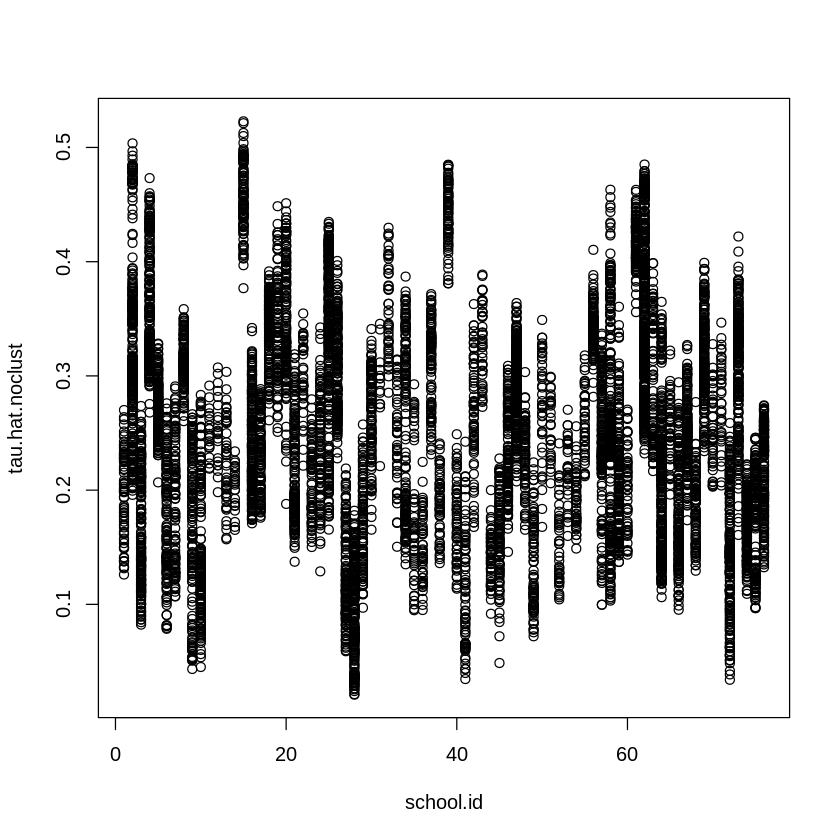

In [ ]:
cf.noclust = causal_forest(X[,selected.idx], Y, W,
                           Y.hat = Y.hat, W.hat = W.hat,
                           tune.parameters = "all")

ATE.noclust = average_treatment_effect(cf.noclust)
paste("95% CI for the ATE:", round(ATE.noclust[1], 3),
      "+/-", round(qnorm(0.975) * ATE.noclust[2], 3))

test_calibration(cf.noclust)

tau.hat.noclust = predict(cf.noclust)$predict
plot(school.id, tau.hat.noclust)

nfold = 5
school.levels = unique(school.id)
cluster.folds = sample.int(nfold, length(school.levels), replace = TRUE)

tau.hat.crossfold = rep(NA, length(Y))
for (foldid in 1:nfold) {
  print(foldid)
  infold = school.id %in% school.levels[cluster.folds == foldid]
  cf.fold = causal_forest(X[!infold, selected.idx], Y[!infold], W[!infold],
                          Y.hat = Y.hat[!infold], W.hat = W.hat[!infold],
                          tune.parameters = "all")
  pred.fold = predict(cf.fold, X[infold, selected.idx])$predictions
  tau.hat.crossfold[infold] = pred.fold
}

cf.noclust.cpy = cf.noclust
cf.noclust.cpy$predictions = tau.hat.crossfold
cf.noclust.cpy$clusters = school.id
test_calibration(cf.noclust.cpy)

Rloss = mean(((Y - Y.hat) - tau.hat * (W - W.hat))^2)
Rloss.noclust = mean(((Y - Y.hat) - tau.hat.noclust * (W - W.hat))^2)
Rloss.crossfold = mean(((Y - Y.hat) - tau.hat.crossfold * (W - W.hat))^2)

c(Rloss.noclust - Rloss, Rloss.crossfold - Rloss)

summary(aov(dr.score ~ factor(school.id)))

In this part, they compared results with and without considering school groups. By redoing the model without the school clustering, the authors showed why it's important to think about how data is organized. Accounting for clusters was crucial to address intra-school correlations and variances effectively.

## 6. Analaysis without fitting the propensity score

In [ ]:
cf.noprop = causal_forest(X[,selected.idx], Y, W,
                          Y.hat = Y.hat, W.hat = mean(W),
                          tune.parameters = "all",
                          equalize.cluster.weights = TRUE,
                          clusters = school.id)
tau.hat.noprop = predict(cf.noprop)$predictions

ATE.noprop = average_treatment_effect(cf.noprop)
paste("95% CI for the ATE:", round(ATE.noprop[1], 3),
      "+/-", round(qnorm(0.975) * ATE.noprop[2], 3))

pdf("tauhat_noprop.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
plot(tau.hat, tau.hat.noprop,
     xlim = range(tau.hat, tau.hat.noprop),
     ylim = range(tau.hat, tau.hat.noprop),
     xlab = "orthogonalized causal forest estimates",
     ylab = "non-orthogonalized causal forest")
abline(0, 1, lwd = 2, lty = 2, col = 4)
par = pardef
dev.off()

[1] "95% CI for the ATE: 0.255 +/- 0.039"

png 
  2

In their analysis, the authors evaluated the reliability of treatment effect estimates when the propensity score was excluded. The authors found that excluding the propensity score led to less reliable treatment effect estimates.

### Train forest on school-wise DR scores

In [ ]:
school.X = (t(school.mat) %*% as.matrix(X[,c(4:8, 25:28)])) / school.size
school.X = data.frame(school.X)
colnames(school.X) = c("X1", "X2", "X3", "X4", "X5",
                    "XC.1", "XC.2", "XC.3", "XC.4")

dr.score = tau.hat + W / cf$W.hat * (Y - cf$Y.hat - (1 - cf$W.hat) * tau.hat) -
  (1 - W) / (1 - cf$W.hat) * (Y - cf$Y.hat + cf$W.hat * tau.hat)
school.score = t(school.mat) %*% dr.score / school.size

school.forest = regression_forest(school.X, school.score)
school.pred = predict(school.forest)$predictions
test_calibration(school.forest)


# Alternative OLS analysis
school.DF = data.frame(school.X, school.score=school.score)
coeftest(lm(school.score ~ ., data = school.DF), vcov = vcovHC)


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value Pr(>t)    
mean.forest.prediction         1.004597   0.083195 12.0751 <2e-16 ***
differential.forest.prediction 0.761064   0.711708  1.0693 0.1442    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



t test of coefficients:

               Estimate  Std. Error t value Pr(>|t|)   
(Intercept)  0.24066452  0.07701155  3.1250 0.002642 **
X1          -0.05087747  0.02913346 -1.7464 0.085401 . 
X2           0.01379108  0.03386216  0.4073 0.685127   
X3           0.00964038  0.02635691  0.3658 0.715712   
X4           0.02483639  0.02567419  0.9674 0.336892   
X5          -0.03626846  0.02667068 -1.3599 0.178501   
XC.1         0.00045043  0.09345896  0.0048 0.996169   
XC.2         0.08662630  0.10506074  0.8245 0.412605   
XC.3        -0.13687519  0.08789854 -1.5572 0.124207   
XC.4         0.04518506  0.08162091  0.5536 0.581726   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Experiment with no orthogonalization

In [ ]:
n.synth = 1000
p.synth = 10
X.synth = matrix(rnorm(n.synth * p.synth), n.synth, p.synth)
W.synth = rbinom(n.synth, 1, 1 / (1 + exp(-X.synth[,1])))
Y.synth = 2 * rowMeans(X.synth[,1:6]) + rnorm(n.synth)

Y.forest.synth = regression_forest(X.synth, Y.synth)
Y.hat.synth = predict(Y.forest.synth)$predictions
W.forest.synth = regression_forest(X.synth, W.synth)
W.hat.synth = predict(W.forest.synth)$predictions

cf.synth = causal_forest(X.synth, Y.synth, W.synth,
                         Y.hat = Y.hat.synth, W.hat = W.hat.synth)
ATE.synth = average_treatment_effect(cf.synth)
paste("95% CI for the ATE:", round(ATE.synth[1], 3),
      "+/-", round(qnorm(0.975) * ATE.synth[2], 3))

cf.synth.noprop = causal_forest(X.synth, Y.synth, W.synth,
                                Y.hat = Y.hat.synth, W.hat = mean(W.synth))
ATE.synth.noprop = average_treatment_effect(cf.synth.noprop)
paste("95% CI for the ATE:", round(ATE.synth.noprop[1], 3),
      "+/-", round(qnorm(0.975) * ATE.synth.noprop[2], 3))


[1] "95% CI for the ATE: 0.094 +/- 0.147"

[1] "95% CI for the ATE: 0.184 +/- 0.139"

# Visualize school-level covariates by treatment heterogeneity

[1] 0.2105263

[1] 0.5384615

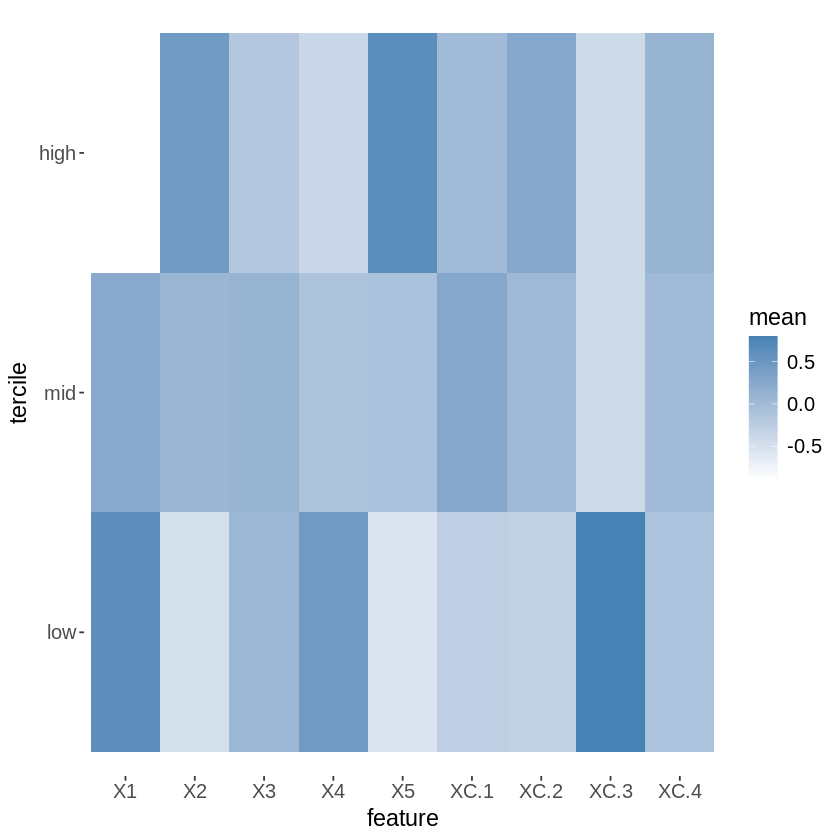

In [ ]:
school.X.std = scale(school.X)
school.tercile = cut(school.pred,
                     breaks = c(-Inf, quantile(school.pred, c(1/3, 2/3)), Inf))
school.tercile.mat = model.matrix(~ school.tercile + 0)
school.means = diag(1 / colSums(school.tercile.mat)) %*% t(school.tercile.mat) %*% as.matrix(school.X.std)

MM = max(abs(school.means))
HC = heat.colors(21)
school.col = apply(school.means, 1:2, function(aa) HC[1 + round(20 * (0.5 + aa))])

DF.plot = data.frame(tercile=rep(factor(1:3, labels=c("low", "mid", "high")), 9), mean=as.numeric(school.means),
                     feature = factor(rbind(colnames(school.X), colnames(school.X), colnames(school.X))))

ggplot(data = DF.plot, aes(x = feature, y = tercile, fill = mean)) +
    geom_tile() + scale_fill_gradient(low = "white", high = "steelblue") +
    theme(axis.text = element_text(size=12), axis.title = element_text(size=14),
          legend.title = element_text(size=14), legend.text = element_text(size=12)) +
    theme(panel.background = element_blank())
ggsave("tercile_plot.pdf", width = 8, height = 4.5, dpi = 120)

mean(school.X$XC.3)
mean(school.X$XC.3[as.numeric(school.tercile) == 1])

# CATE by school

In [ ]:
ord = order(order(school.pred))
school.sort = ord[school.id]

pdf("school_boxplot.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(tau.hat.noclust ~ school.sort, xaxt = "n",
        xlab = "school", ylab = "estimated CATE")
points(1:76, sort(school.pred), col = 4, pch = 16)
legend("topleft", c("school mean CATE", "CATE w/o clustering"), pch = c(16, 1), col = c(4, 1), cex = 1.5)
par = pardef
dev.off()

png 
  2

png 
  2

These graphics emphasize the differences in how mindset training affects students, both within each school and across schools as a whole. They help identify schools where the training has a particularly strong or weak impact. This information is crucial for understanding how effective the training is in different contexts and for directing interventions where they're needed most.